### Импорты

In [2]:
import numpy as np
import filters

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Загружаем картинку для применения к ней фильтра

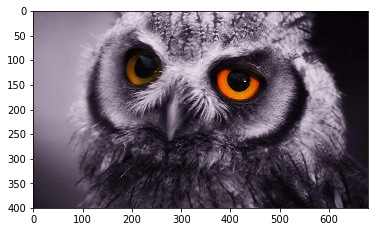

In [3]:
img = mpimg.imread('example.jpg')


imgplot = plt.imshow(img)
plt.show()

img_copy = np.copy(img)

### Общие методы для работы с изображениями
**get_index** - возвращает индекс с определенной стратегией выхода за границы (при выходе возвращает границу)

**getp_rgb** - возвращает 3 канала цветности одного пикселя

**set_pix** - назначает значение пикселю с заданным индексом

**clamp** - ограничивает значение канала цветности, при выходе за предельные допустимые значения

## Фильтр Kuwahara 
#### Нелинейный сглаживающий фильтр, используемый для адаптивного уменьшения шумов 

## Алгоритм

**1) В окрестности каждого пикселя применить маску размером (r+1)*(r+1)**

**2) Окрестность разделить на 4 области, указанные цифрами I, II, III, IV, размером r*r**

**3) Вычислить среднюю интенсивность и дисперсию в каждой из областей I, II, III, IV**

**4) Присвоить центральному пикселю X среднее значение интенсивности той области, дисперсия которой наименьшая**

### Параметры фильтра
**r** - Радиус Фильтра

**n** - Фиксированный размер подрегиона

**TSIGMA** - Пороговое значение сигмы для регионов

**dp** - d-

**dm** - d+

## Методы обработки пикселей

**filter_pixel** - обработка пикселя

**eval_subregion** - Оценка региона с центром в (u, v)

### Результат работы фильтра Kuwara при значения параметров:
**r** = 2

**t_sigma** = 5.0

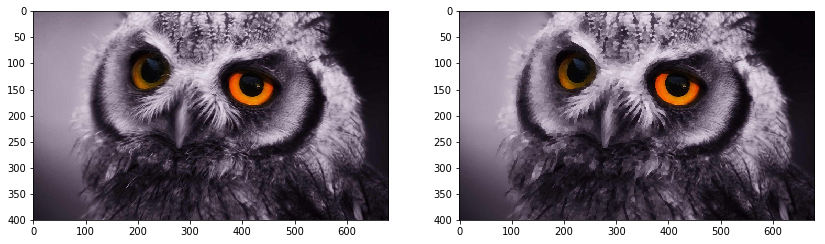

In [13]:
filter_c = filters.FiltersCV(img)
img_kuwara = filter_c.filter_kuwara(2, 5.0)

plt.figure(figsize=[14, 8])

plt.subplot(121)
plt.imshow(img)
    
plt.subplot(122)
plt.imshow(img_kuwara)
    
plt.show()

### Результат работы фильтра Kuwara  при значениях параметров:

**r** = 5

**t_sigma** = 5.0

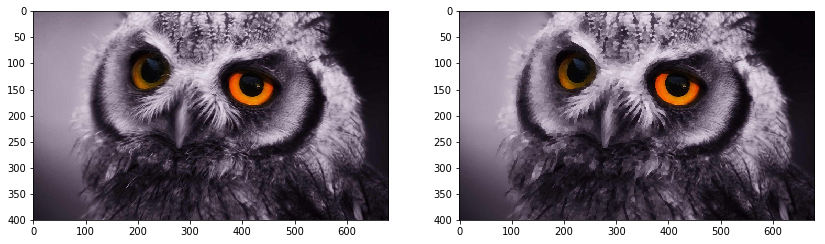

In [15]:
img_kuwara = filter_c.filter_kuwara(, 5.0)

plt.figure(figsize=[14, 8])

plt.subplot(121)
plt.imshow(img)
    
plt.subplot(122)
plt.imshow(img_kuwara)
    
plt.show()

# 5x5 Фильтр Nagao Matsuyama

**1) Рассмотрим 9 вариантов "окна" размером 5х5**

**2) Выставим значение искомому пикселю - среднее значение по "окну" с наименьшей дисперсией**


**var_threshold** - пороговое значение отклонения

![image.png](attachment:image.png)

### Результат работы фильтра Nagao  при значениях параметров:

**var_threshold** = 8.0

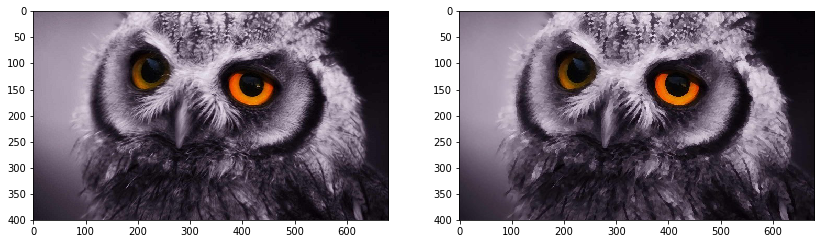

In [24]:
img1 = mpimg.imread('example.jpg')
filter_c1 = filters.FiltersCV(img1)


img_nagao_matsuyama = filter_c1.filter_nagao(8.0)

plt.figure(figsize=[14, 8])

plt.subplot(121)
plt.imshow(img)
    
plt.subplot(122)
plt.imshow(img_nagao_matsuyama)
    
plt.show()

### Результат работы фильтра Nagao  при значениях параметров:

**var_threshold** = 10.0

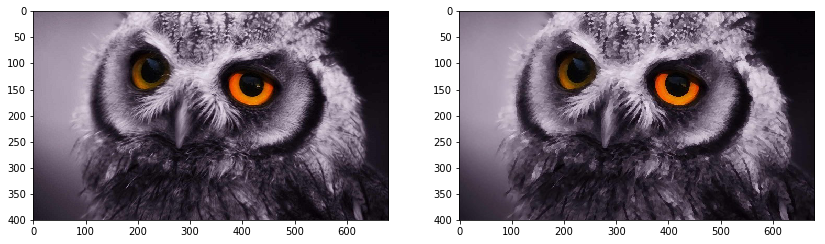

In [22]:
img_nagao_matsuyama = filter_c1.filter_nagao(10.0)

plt.figure(figsize=[14, 8])

plt.subplot(121)
plt.imshow(img)
    
plt.subplot(122)
plt.imshow(img_nagao_matsuyama)
    
plt.show()

# Фильтр Perona Malik

### В общем виде алгоритм можно описать так:

**1) Определяем ширину и высоту изображения (назовем w и h соответственно)**

**2) Выделяем память под двумерный массив размерностью (w+2)*(h+2) (назовем I)**

**3) Создаем двумерный массив размерностью (w+2)*(h+2) (назовем B)**

**4) Заполняем массив нулями I=0**

**5) Считываем изображение и записываем данные пикселей в центр массива I (то есть оставляем слева, справа, сверху, снизу по одному нулевому столбцу или строке)**

**6) Повторяем пока level < t (вначале level=0)**

**7) Пересчитываем все ячейки массива I**

**8) Заменяем данные изображение в I на B**

**9) Создаем и сохраняем изображение из данных массива B**

![image.png](attachment:image.png)


**iterations** - кол-во итераций

**alpha** - обновление степени прозрачности

**kappa** - Параметр сглаживания

**smoothRegions** - тип функции с()

**useLinearRgb** - Использовать линейный тип RGB

### Результат работы фильтра Malik  при значениях параметров:

**iterations** - 10

**alpha** - 0.2

**kappa** - 25

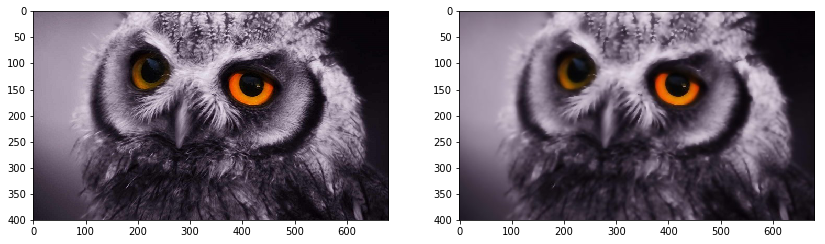

In [26]:
img_nagao_perona = filter_c1.filter_malik(10, 0.2, 25)

plt.figure(figsize=[14, 8])

plt.subplot(121)
plt.imshow(img)
    
plt.subplot(122)
plt.imshow(img_nagao_perona)
    
plt.show()

### Результат работы фильтра Malik  при значениях параметров:

**iterations** - 25

**alpha** - 0.3

**kappa** - 25

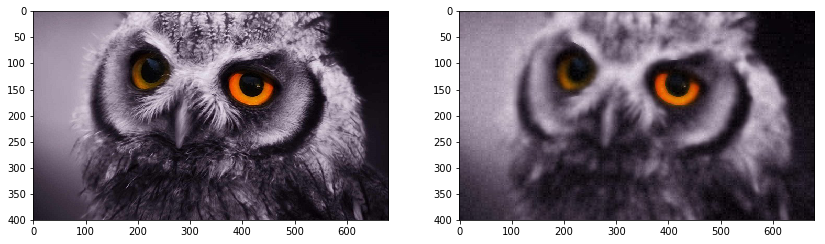

In [27]:
img_nagao_perona = filter_c1.filter_malik(10, 0.2, 25)

plt.figure(figsize=[14, 8])

plt.subplot(121)
plt.imshow(img)
    
plt.subplot(122)
plt.imshow(img_nagao_perona)
    
plt.show()